In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
comments_df = pd.read_csv('C:\\Users\\Laxmi Agarwal\\Desktop\\Data Analysis\\Youtube_project_shan_singh\\UScomments.csv', error_bad_lines=False)

C:\Users\Laxmi Agarwal\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\Laxmi Agarwal\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
comments_df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [4]:
comments_df.count()

video_id        691400
comment_text    691375
likes           691400
replies         691400
dtype: int64

In [5]:
comments_df.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [6]:
comments_df.dropna(inplace=True)

In [7]:
#!pip install textblob

In [8]:
from textblob import TextBlob

In [9]:
TextBlob('trending 😉').sentiment
TextBlob('trending 😉').sentiment.polarity
#subjectivity is a line without any sentiment
#Polarity is stating whether the text is positive or not.

0.0

In [10]:
#df=comments_df[0:1000]

In [11]:
#try and except is for handling any errors
polarity=[]
for comments in comments_df['comment_text']:
    try:
        polarity.append(TextBlob(comments).sentiment.polarity)
    except:
        polarity.append(0)

In [12]:
comments_df['polarity']=polarity

In [13]:
comments_positive=comments_df[comments_df['polarity']==1]

In [14]:
comments_negative=comments_df[comments_df['polarity']==-1]

In [15]:
comments_df.sample(15)

,video_id,comment_text,likes,replies,polarity
649627,iKYQN5xMRQg,Dumb,0,0,-0.375000
87677,nRGz2md8l28,That's a fucking pizza,0,0,-0.600000
240063,RlduVwzqK2o,She is too good and pure for this world,0,0,0.457143
572659,KGQTkWJ5mU4,#26 on trending,0,0,0.000000
474805,YLM2gl8RGj0,Can you please recreate Miranda make up look o...,0,0,0.000000
260937,HsiWOp-ImoE,Are the table cards on the reception desk an E...,0,0,0.000000
594086,oKzFGhlFqqE,This dude is pathetic.....not to mention about...,2,0,0.250000
665851,ZWTlL_w8cRA,You are such an inspiration Demi. You're prett...,0,0,0.183139
572048,msWS8WxRsrY,I miss nail art :(,0,0,-0.750000
121665,z5eG8fD-hQw,"Is this guy an idiot,",0,0,-0.800000


## Wordcloud Generation

In [16]:
from wordcloud import WordCloud

In [17]:
from wordcloud import WordCloud , STOPWORDS
#Stopwords are the words which doesn't any sense in analysis like is, he etc.

In [18]:
?WordCloud

In [19]:
comments_negative['comment_text']

512       BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...
562       Well… The brain surgeon Ben Carson just proved...
952              WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!
1371                                         WTF BRUH!!!!!!
1391                        cheeseus christ thats insane!!!
                                ...                        
690788                                  Like Kelly she evil
690865                       R U FUCKING KIDDING ME?!?!?!?!
691073             This is horribly offensive please report
691180    Sink holes looks terrifying sinkholes sink you...
691224    Trump talked to the president of US Virgin Isl...
Name: comment_text, Length: 3508, dtype: object

In [20]:
#converting series into string with join fucntion. 
total_comments = ' '.join(comments_negative['comment_text'])

In [21]:
total_comments[0:100]

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!! "

## Wordcloud for negative comments

(-0.5, 399.5, 199.5, -0.5)

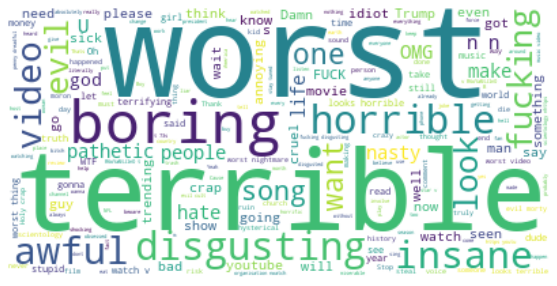

In [22]:
#Using set for stopwords to get all the unqiue stopwords to eliminate them.
wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(total_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

-total_comment is positive and total_comments is negative.
-https://www.datacamp.com/community/tutorials/wordcloud-python.
-Interpolation helps in presenting us smooth images.

In [23]:
total_comment= ' '.join(comments_positive['comment_text'])

In [24]:
total_comment[0:100]

'yu are the best Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as bes'

## Wordcloud for positive comments

(-0.5, 399.5, 199.5, -0.5)

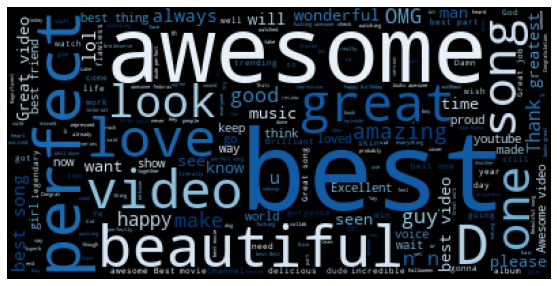

In [25]:
wordcloud_pos = WordCloud(stopwords=set(STOPWORDS), colormap='Blues').generate(total_comment)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud_pos)
plt.axis('off')
#wordcloud_pos.recolor(color_func = grey_color_func)

## positive test wordcloud masked in a twitter image.

In [26]:
from PIL import Image 
# use this line to use image module in our program 
#Python Image Library

(-0.5, 315.5, 255.5, -0.5)

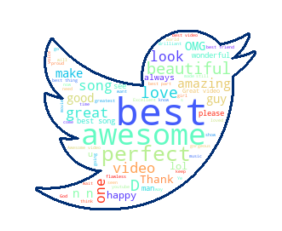

In [27]:
#https://www.kaggle.com/tarzon/input-img?select=cloud.png
#Generate a word cloud image
stopwords = set(STOPWORDS)
mask = np.array(Image.open("C:\\Users\\Laxmi Agarwal\\Downloads\\Twitter.png"))
#mask.show()
wordcloud_pos = WordCloud(stopwords=stopwords,background_color='white', max_words=1000, mask=mask,contour_color='#023075',contour_width=3,colormap='rainbow').generate(total_comment)
# create image as cloud
plt.figure()
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")

## Emoji Analysis

In [28]:
import emoji

In [29]:
print('\U0001F600')

😀


In [30]:
cmt = 'trending 😀'

In [31]:
cmt

'trending 😀'

In [32]:
#List comprehension
[c for c in cmt if c in emoji.UNICODE_EMOJI_ENGLISH]

<ipython-input-32-e457f6320c85>:1: DeprecationWarning: 'emoji.UNICODE_EMOJI_ENGLISH' is deprecated and will be removed in version 2.0.0. Use 'emoji.EMOJI_DATA' instead.
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  [c for c in cmt if c in emoji.UNICODE_EMOJI_ENGLISH]


['😀']

In [33]:
emoji_list=[]
for comments in comments_df['comment_text']:
    for char in comments:
        if char in emoji.UNICODE_EMOJI_ENGLISH:
            emoji_list.append(char)

<ipython-input-33-091ce9074975>:4: DeprecationWarning: 'emoji.UNICODE_EMOJI_ENGLISH' is deprecated and will be removed in version 2.0.0. Use 'emoji.EMOJI_DATA' instead.
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  if char in emoji.UNICODE_EMOJI_ENGLISH:


In [34]:
len(emoji_list)

294549

In [38]:
#For counting values in a list.
from collections import Counter

In [43]:
Counter(emoji_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [44]:
Counter(emoji_list).most_common(10)[0][0]

'😂'

In [48]:
Counter(emoji_list).most_common(10)[0][1]

36987

In [46]:
emojis = [Counter(emoji_list).most_common(10)[i][0] for i in range(10)]

In [50]:
emoji_val = [Counter(emoji_list).most_common(10)[i][1] for i in range(10)]

In [51]:
emoji_val

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [58]:
import plotly.graph_objs as go

In [59]:
from plotly.offline import iplot
#showing the graph.

In [65]:
iplot([go.Bar(x=emojis, y= emoji_val)])

## Merging all the additional data

In [66]:
import os

In [67]:
path = r'C:\Users\Laxmi Agarwal\Desktop\Data Analysis\Youtube_project_shan_singh\additional_data'

In [69]:
files=os.listdir(path)

In [71]:
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [77]:
for i in range(1,len(files),2):
    print(i)

1
3
5
7
9
11
13
15
17
19


In [78]:
files_csv = [files[i] for i in range(0,len(files),2)]

In [81]:
files_csv[0].split('.')[0][0:2]

'CA'

In [83]:
full_df=pd.DataFrame()
for file in files_csv:
    current_df = pd.read_csv(path+'/'+file, encoding='iso-8859-1', error_bad_lines=False)
    
    current_df['country']=file.split('.')[0][0:2]
    full_df=pd.concat([full_df,current_df])

In [84]:
full_df.shape

(375942, 17)

In [87]:
current_df.shape

(40949, 17)

In [88]:
current_df['country'].value_counts()

US    40949
Name: country, dtype: int64

In [85]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA


## Which category has maximum likes?

In [91]:
full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [95]:
cat=pd.read_csv(r'C:\Users\Laxmi Agarwal\Desktop\Data Analysis\Youtube_project_shan_singh/category_file.txt',sep=":")
#Used sep parameter as it was a text file.

In [98]:
cat.reset_index(inplace=True)
#inplace is to update the df and return the origional df instead of a copy of the object.

In [99]:
cat

,index,Category_id Category_name
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [100]:
cat.columns=['category_id','category_name']

In [101]:
cat.set_index('category_id',inplace=True)

In [102]:
cat

,category_name
category_id,
1,Film & Animation
2,Autos & Vehicles
10,Music
15,Pets & Animals
17,Sports
18,Short Movies
19,Travel & Events
20,Gaming
21,Videoblogging


In [105]:
dct=cat.to_dict()

In [106]:
dct['category_name']

{1: ' Film & Animation',
 2: ' Autos & Vehicles',
 10: ' Music',
 15: ' Pets & Animals',
 17: ' Sports',
 18: ' Short Movies',
 19: ' Travel & Events',
 20: ' Gaming',
 21: ' Videoblogging',
 22: ' People & Blogs',
 23: ' Comedy',
 24: ' Entertainment',
 25: ' News & Politics',
 26: ' Howto & Style',
 27: ' Education',
 28: ' Science & Technology',
 29: ' Nonprofits & Activism',
 30: ' Movies',
 31: ' Anime/Animation',
 32: ' Action/Adventure',
 33: ' Classics',
 34: ' Comedy',
 35: ' Documentary',
 36: ' Drama',
 37: ' Family',
 38: ' Foreign',
 39: ' Horror',
 40: ' Sci-Fi/Fantasy',
 41: ' Thriller',
 42: ' Shorts',
 43: ' Shows',
 44: ' Trailers            '}

In [107]:
full_df['category_name']=full_df['category_id'].map(dct['category_name'])

In [108]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'category_name'],
      dtype='object')

In [109]:
full_df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,Comedy


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

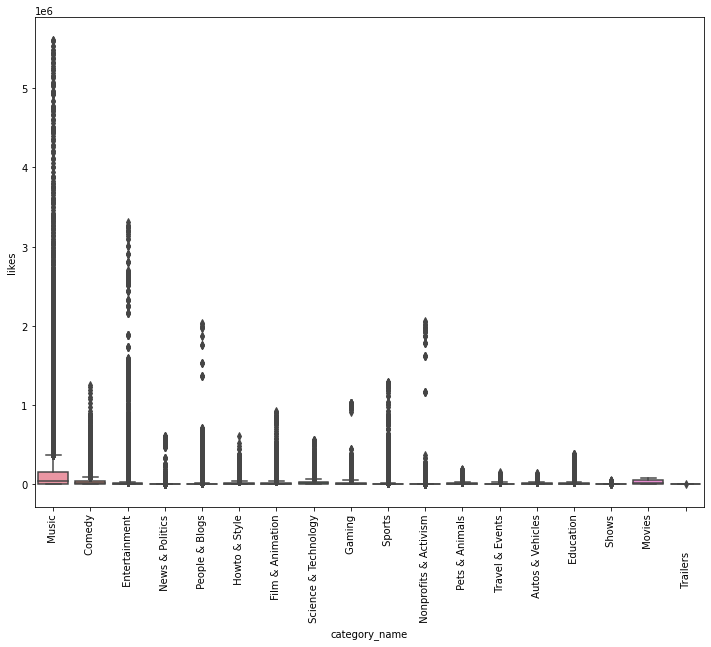

In [110]:
plt.figure(figsize=(12,9))
sns.boxplot(x='category_name', y='likes', data=full_df)
plt.xticks(rotation='vertical')

-Music is the most liked category. 

## The Auidence is engaing or not?
1.Like rate of any video.
2.Dislike rate of any video.
3.Comments_rate of any video.
4.views

In [112]:
full_df['likes_rate']=(full_df['likes']/full_df['views'])*100
full_df['dislike_rate']=(full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate']=(full_df['comment_count']/full_df['views'])*100

In [114]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_name,likes_rate,dislike_rate,comment_rate,comment_count_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Music,4.589104,0.253051,0.733639,0.733639
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,False,False,False,STill got a lot of packages. Probably will las...,CA,Comedy,12.594873,0.166363,1.284185,1.284185
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,Comedy,4.575843,0.167292,0.256342,0.256342
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,...,False,False,False,I know it's been a while since we did this sho...,CA,Entertainment,6.309630,0.094903,0.835851,0.835851
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,...,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA,Music,4.874563,0.062887,0.253752,0.253752


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

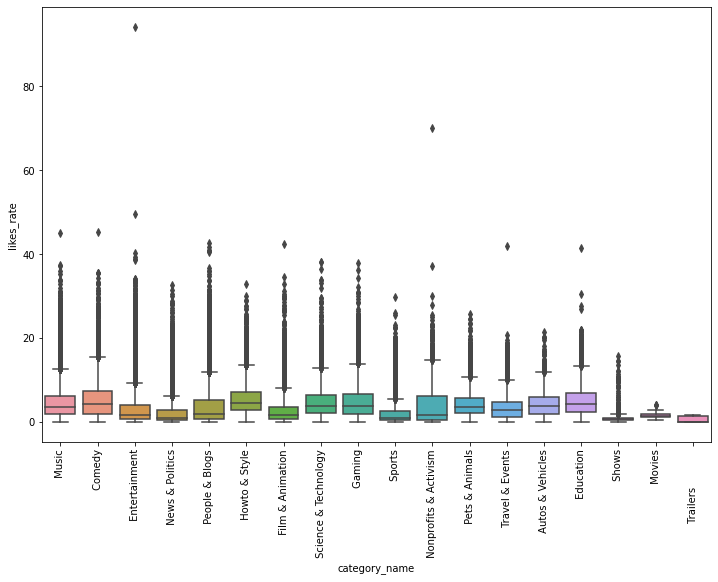

In [120]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name', y ='likes_rate', data=full_df)
plt.xticks(rotation='vertical')

Finding thr relationship between the likes and views.
Will the views effect the no.of likes?
for this we can plot a scatter plot & regressionplot.

<AxesSubplot:xlabel='views', ylabel='likes'>

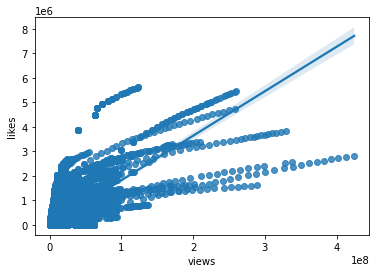

In [122]:
sns.regplot(data=full_df, x='views', y='likes')

<AxesSubplot:>

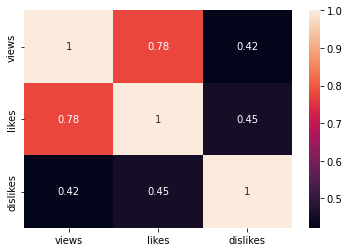

In [125]:
sns.heatmap(full_df[['views', 'likes', 'dislikes']].corr(),annot=True)
#annot is for showing correaltion values.


## Analyzing trending videos

In [126]:
full_df['video_id'].unique()

array(['n1WpP7iowLc', '0dBIkQ4Mz1M', '5qpjK5DgCt4', ..., 'qPEIPu0V8GQ',
       'dS5Thrl-4Kc', 'yz7Xq3T0YPs'], dtype=object)

In [127]:
full_df['channel_title'].unique()

array(['EminemVEVO', 'iDubbbzTV', 'Rudy Mancuso', ..., 'Ben Kronengold',
       'All Def Digital', 'How It Should Have Ended'], dtype=object)

In [131]:
cdf=full_df.groupby('channel_title')['video_id'].count().sort_values(ascending=False).to_frame().reset_index().rename(columns={'video_id':'total_videos'})

In [132]:
import plotly.express as px

In [133]:
px.bar(data_frame=cdf[:20], x= 'channel_title', y = 'total_videos')

## Does punctuations have any impact on likes, dislikes and views?

In [142]:
import string

In [143]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [144]:
def punc_count(x):
    return len([c for c in x if c in string.punctuation])

In [145]:
full_df['title'][0]

0          Eminem - Walk On Water (Audio) ft. BeyoncÃ©
0    Sing zu Ende! | Gesangseinlagen vom Feinsten |...
0             Malika LePen : Femme de Gauche - Trailer
0        John Lewis Christmas Ad 2017 - #MozTheMonster
0    Sharry Mann: Cute Munda ( Song Teaser) | Parmi...
0    é¸èªããªãåç´ã«è½ä¸ï¼è·¯ä¸ã®è»ã...
0             ì¢ì by ë¯¼ì_ì¤ì¢
ì _ì¢ë ëµê°
0                       CapÃ­tulo 12 | MasterChef 2017
0    ÐÐ°Ñ
Ð°Ñ Ð¸ ÐÐ¾Ð»Ð¸Ð½Ð° ÑÑÐ°ÑÑÑ ÑÐºÐ¾...
0                   WE WANT TO TALK ABOUT OUR MARRIAGE
Name: title, dtype: object

In [146]:
sample=full_df[0:10000]

In [147]:
sample['count_punc']=sample['title'].apply(punc_count)

<ipython-input-147-4f66b4222e13>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [149]:
sample.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,ratings_disabled,video_error_or_removed,description,country,category_name,likes_rate,dislike_rate,comment_rate,comment_count_rate,count_punc
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Music,4.589104,0.253051,0.733639,0.733639,4
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,False,False,STill got a lot of packages. Probably will las...,CA,Comedy,12.594873,0.166363,1.284185,1.284185,1
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,Comedy,4.575843,0.167292,0.256342,0.256342,3
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,...,False,False,I know it's been a while since we did this sho...,CA,Entertainment,6.309630,0.094903,0.835851,0.835851,3
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,...,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA,Music,4.874563,0.062887,0.253752,0.253752,3


<AxesSubplot:xlabel='count_punc', ylabel='views'>

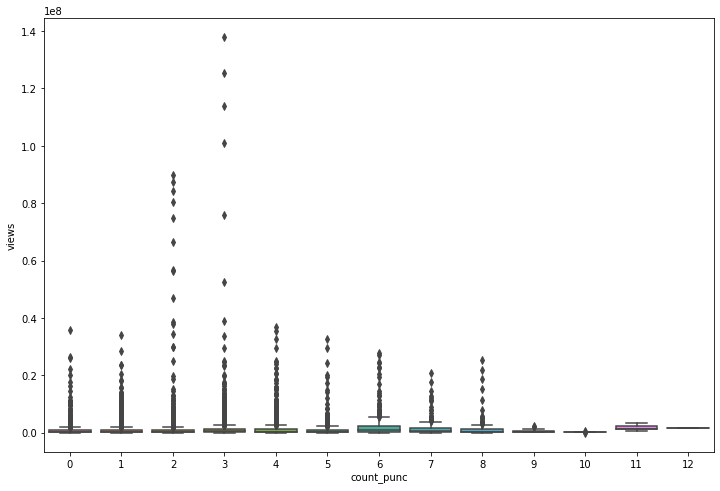

In [151]:
plt.figure(figsize=(12,8))
sns.boxplot(x='count_punc',y='views', data=sample)

In [152]:
sample['count_punc'].corr(sample['views'])

0.06510009783044858